## Image Analysis

Images are a common form of data encountered in scientific disciplines from astronomy to medicine to metallurgy and knowing how to work with them is a valuable skillset. Image analysis tools are becoming increasingly powerful allowing researchers to ask new questions and speed us existing workflows. Machine learning methods that we are learning about right now have also been applied to image analysis and can do some things that start to sound like science fiction: facial recognition and robots that can see and interact with their environment. We won't be doing anything on that level here in class, but we will get you on the right track to feeling comfortable with interacting with images in Python and giving you a set of tools to do some introductory analyses of common imaging problems.

In **Lecture 1**, we will learn how to import, save, and interact with image datasets, learn some basics about images, and introduce [**scikit-image**](https://scikit-image.org/) or **skimage**, a collection of tools for image processing workflows.

In **Lecture 2** we will apply the tools from skimage to perform a common image analysis task: image registration and calculation of morphological properties of objects in the image.

## Importing and Saving Images

First off, in order to work with images, we need to be able to read them into our Jupyter notebook. We will interact with images as a variable within our workspace. For the purposes of this demonstration, we will be using images from the `skimage.data module`. We will also import the `skimage.io` module, which has a useful set of functions for importing, displaying, and saving images.

In [ ]:
import skimage
import skimage.io as sio
import matplotlib.pyplot as plt

from skimage import data

Our first example will use an image of a photographer, and store it as the variable `camera`. 

In [ ]:
camera = data.camera()

You may be curious what this object is, so let's check `type(camera)`:

In [ ]:
type(camera)

numpy.ndarray

Ah, so `skimage` reads in images as numpy arrays. Digital images in fact are nothing more than an array of pixel intensities, so numpy arrays are a natural medium for image datasets. Other things you may want to check about your image is the datatype of each individal pixel and the size of the image, and maybe check a small subset of the data:

In [ ]:
camera.dtype

dtype('uint8')

In [ ]:
camera.shape

(512, 512)

In [ ]:
camera[0:10, 0:10]

array([[156, 157, 160, 159, 158, 156, 155, 156, 158, 157],
       [156, 157, 159, 158, 158, 156, 155, 156, 158, 157],
       [158, 157, 156, 156, 157, 157, 157, 157, 157, 158],
       [160, 157, 154, 154, 156, 157, 158, 157, 157, 158],
       [158, 157, 156, 156, 157, 156, 155, 155, 157, 157],
       [156, 157, 159, 159, 159, 156, 154, 155, 158, 157],
       [158, 157, 156, 156, 157, 156, 155, 155, 157, 157],
       [160, 157, 154, 154, 156, 157, 158, 157, 157, 158],
       [158, 155, 153, 153, 155, 157, 158, 158, 158, 157],
       [156, 154, 153, 153, 155, 157, 159, 159, 159, 157]], dtype=uint8)

So our image has 512 x 512 pixels, and each pixel is an 8-bit unsigned integer. This means that each pixel can be assigned a value between 0 and $2^8 - 1$. Good to know. But something you may want to do is convert between image types. Why care? Depending on the image type, they will take up different amounts of space.

We can import a set of utility functions from `skimage.util` to do this:

In [ ]:
import skimage.util as skt

In [ ]:
skt.img_as_float(camera)

array([[0.61176471, 0.61568627, 0.62745098, ..., 0.59607843, 0.59607843,
        0.59607843],
       [0.61176471, 0.61568627, 0.62352941, ..., 0.59607843, 0.59607843,
        0.59607843],
       [0.61960784, 0.61568627, 0.61176471, ..., 0.59607843, 0.59607843,
        0.59607843],
       ...,
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412]])

Let's check what difference it makes in file size. We can save to a file using `sio.imsave`:

In [ ]:
sio.imsave('camera.tif', camera)
sio.imsave('camera_float.tif', skt.img_as_float(camera))

In [ ]:
import os
import numpy as np

print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera_float.tif' is {} KB".format(np.round(os.stat('camera_float.tif').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera_float.tif' is 2097.42 KB


That's a big difference! There was a 10-fold change in size when we went from uint8 images to float-64 images. Keep that in mind when analyzing datasets, especially if you are dealing with very large images like tilescans or videos.

## Image Compression and Resolution

Now would probably be a good time to talk about image formats too. You noticed that I saved the file with a `.tif` extension. What is that? It may be new to you, it may be not. Perhaps you have used `.png` or `.jpeg` or `.gif` file formats. [Here's](https://www.photoup.net/differences-between-file-formats-raw-dng-tiff-gif-png-jpeg/) a good explanation that talks about the most common types. In summary,

* **TIF** (Tagged Image File Format) is very common in scientific imaging. It is lossless (meaning that you don't lose any information during the compression process). The downside is they are extremely large. They also have compatibility issues when using in HTML.

* **GIF** (Graphics Interchange Format): very small, which is useful for animated images on the internet. Perhaps not the most useful for scientific purposes, because they are extremely lossy.

* **PNG** (Portable Network Graphics): some data compression like GIFS, but no loss of information. Probably a good option for some scientific applications.

* **JPEG** (Joint Photographic Experts Group) renders high quality image, has more compression than PNG, but some loss of information.

But what difference does that make on filesize? Let's check:

In [ ]:
sio.imsave('camera.gif', camera)
sio.imsave('camera.jpeg', camera)
sio.imsave('camera.png', camera)

In [ ]:
print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera.gif' is {} KB".format(np.round(os.stat('camera.gif').st_size/1000, 2)))
print("The file 'camera.jpeg' is {} KB".format(np.round(os.stat('camera.jpeg').st_size/1000, 2)))
print("The file 'camera.png' is {} KB".format(np.round(os.stat('camera.png').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera.gif' is 280.61 KB
The file 'camera.jpeg' is 28.21 KB
The file 'camera.png' is 116.22 KB


It looks like file format can make a between 2- and 10-fold difference in file size. 

The last thing we will look at that can impact file size is image resolution. But before we do that, let's actually look at our image. In the first twenty minutes talking about image analysis, and we haven't even pulled up an image!

(-0.5, 511.5, 511.5, -0.5)

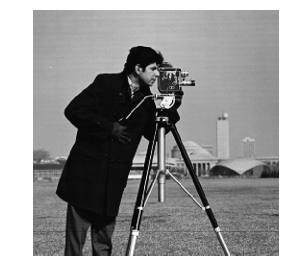

In [ ]:
sio.imshow(camera)
plt.axis('off')

Nice. You can adjust the contrast of the image (for display purposes only-- it doesn't impact the data) using the `vmin` and `vmax` arguments

(-0.5, 511.5, 511.5, -0.5)

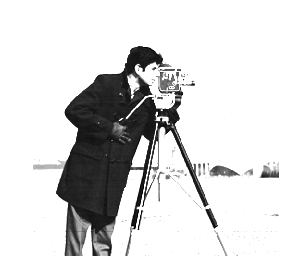

In [ ]:
sio.imshow(camera, vmin=0, vmax=90)
plt.axis('off')

Remember that our original image is 512 x 512 pixels. What if we want to reduce the resolution by, say, 10-fold? We can use a command from the `skimage.transform` module to assist us with that:

In [ ]:
from skimage.transform import rescale

Shape of 0.1x image: (51, 51)


c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(-0.5, 50.5, 50.5, -0.5)

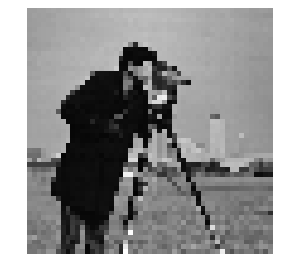

In [ ]:
camera01 = rescale(camera, 0.1)

print('Shape of 0.1x image: {}'.format(camera01.shape))

sio.imshow(camera01)
plt.axis('off')

Similarly, you can increase the resolution using the `rescale` function. Keep in mind, this won't magically increase the image quality. It will just have a lot of replicate pixels. It can be useful though when you need to map a lower resolution image with a higher resolution image.

Shape of 10x image: (5120, 5120)


(-0.5, 5119.5, 5119.5, -0.5)

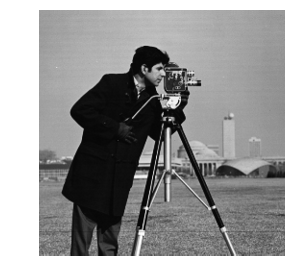

In [ ]:
camera10 = rescale(camera, 10)

print('Shape of 10x image: {}'.format(camera10.shape))

sio.imshow(camera10)
plt.axis('off')

How big of an effect do you think image resolution will have on file size?

In [ ]:
sio.imsave('camera01.tif', camera01)
sio.imsave('camera10.tif', camera10)

In [ ]:
print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera01.tif' is {} KB".format(np.round(os.stat('camera01.tif').st_size/1000, 2)))
print("The file 'camera10.tif' is {} KB".format(np.round(os.stat('camera10.tif').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera01.tif' is 21.07 KB
The file 'camera10.tif' is 209715.47 KB


You can see that by accounting for data type, compression, and resolution, images can $~10^4 - 10^5$ orders of magnitude! Again, something you will definitely need to account for when planning your data storage.

## Working in Color

What if we're working with color images? Well, color images have an extra dimension:

In [ ]:
cat = data.chelsea()

In [ ]:
cat.shape

(300, 451, 3)

(-0.5, 450.5, 299.5, -0.5)

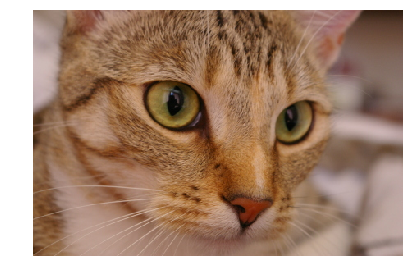

In [ ]:
sio.imshow(cat)
plt.axis('off')

Color images are represented using a **color space**. One of the most common, with which you are probably familiar, is the **RGB space**, with a red, green, and blue channel. We can break the above image into its respective RGB components by selecting the appropriate channel in the numpy array. 

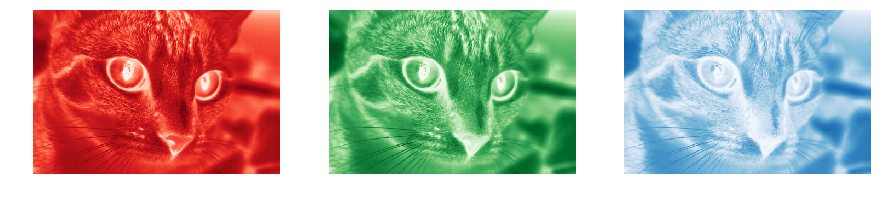

In [ ]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
colors = ['Reds', 'Greens', 'Blues']

counter = 0
for ax, color in zip(axes, colors):
    ax.imshow(cat[:, :, counter], cmap=color)
    ax.axis('off')
    counter += 1

To visualize the RGB space, think of each component as a dimension in a cube:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/RGB_Cube_Show_lowgamma_cutout_a.png" width="200"> </img>

But the RGB color space isn't the only one available, and often isn't the most useful. Introducing the HSV color space, which stands for:

* hue
* saturation
* intensity

It has a slightly different geometrical representation:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png" width="200"> </img>

In [ ]:
from skimage.color import rgb2hsv

In [ ]:
cat_hsv = rgb2hsv(cat)

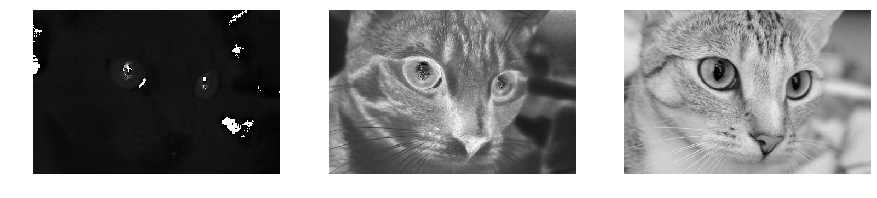

In [ ]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
#colors = ['Reds', 'Greens', 'Blues']

counter = 0
for ax, color in zip(axes, colors):
    ax.imshow(cat_hsv[:, :, counter], cmap='gray')
    ax.axis('off')
    counter += 1

Notice the useful property of HSV that the V element is a black and white rendering of the original image.

## A few basic analysis tools

So far, we have looked at how to work with images examining issues such as input/output, storage, and visualization. But we have yet to actually touch on any aspects of analysis, extracting data from images. Ultimately, we would like to have a numerical set of data that we can manipulate in something like pandas.

Let's look at a very common imaging analysis problem: image segmentation. Image segmentation is the process of labelling groups of pixels of interest within an image that correspond to objects. Sure, you as a human can do this very easily. But its much harder when you want to try to do it programmatically.

Let's pull another example image from the `skimage` library:

(-0.5, 383.5, 302.5, -0.5)

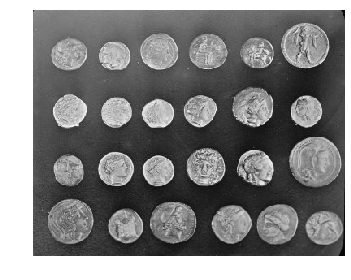

In [ ]:
coins = data.coins()

sio.imshow(coins)
plt.axis('off')

In this image, we can see a selection of coins. We know which pixels are coins and which pixels are background. What distinguishes the two? Well, pixel intensities are a good bet. At this point, it would be useful to know what range of pixel values are in the image. Let's make a histogram:

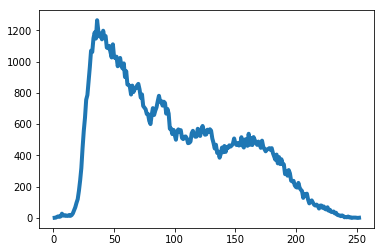

In [ ]:
from skimage.exposure import histogram

hist, hist_centers = histogram(coins)
plt.plot(hist_centers, hist, linewidth=4)

High values correspond to brighter pixels and low values correspond to darker pixels. There seems to be a large peak at ~40 that corresponds to background, and another peak at ~165 that corresponds to the coins. Let's try setting a threshold that binarizes our image into either background or coins. We'll try a few different values to see what happens:

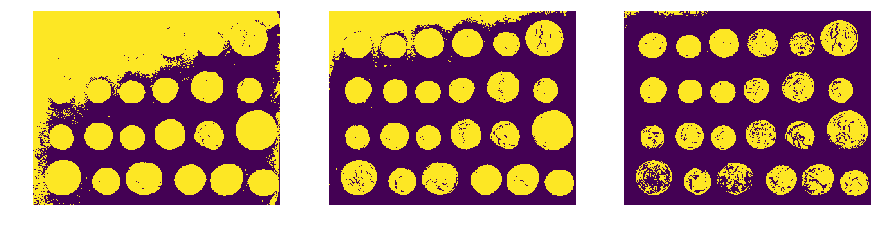

In [ ]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
thresh = [70, 100, 130]

counter = 0
for ax, thres in zip(axes, thresh):
    ax.imshow(coins > thres)
    ax.axis('off')
    counter += 1

You can see the problem. When we set a low threshold, a lot of the background gets improperly labelled. Due to some uneven illumination, the upper left corner all gets detected. If we set a high threshold, the whole coins don't get labelled. There are lots of holes. And in all cases, there are some objects that definitely aren't coins: a few stray pixels here and there. How do we get a cleaner separation of coins and background?

Well, one good idea would be to to look at pixel intensity gradients instead of absolute values. Visually, you can tell there is a sharp drop at the edges of coins. `skimage` has a tool for edge detection in the `skimage.feature` module called `canny`. For a little background, the `canny` decector performs the following steps:

1. Apply a Gaussian filter to smooth the image in order to remove noise.
2. Find the intensity gradients of the image.
3. Apply non-maximum suppression to get rid of spurious responses (thin the edges).
4. Apply double threshold (low and high thresholds) to determine potential edges.
5. Suppress "weak" edges.

(-0.5, 383.5, 302.5, -0.5)

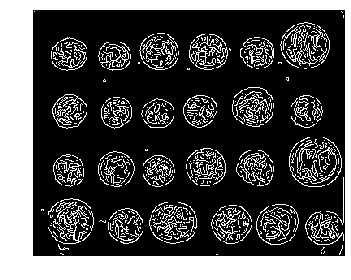

In [ ]:
from skimage.feature import canny

edges = canny(coins/255., sigma=0.8)

sio.imshow(edges)
plt.axis('off')

It would be beneficial to talk about each of the substeps of an edge detector, as they can be useful in developing your own imaging workflows. First, Gaussian filters.

When you apply a filter to an image, you are doing some matrix math with a function referred to as a convolution. Think of it as a moving average over the original image. You as the user have two knobs you can turn: the size of the window over which the average is taken, and the contribution of each individual pixel to the final average. This is represented mathematically as a matrix operation:

$A = \begin{bmatrix} 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\end{bmatrix} * B$

In the case when all the values in the matrix are ones, you have applied a mean filter, because each pixel within the "window" contributes equally to the final value. Let's try applying a mean filter of varying sizes to our original image:

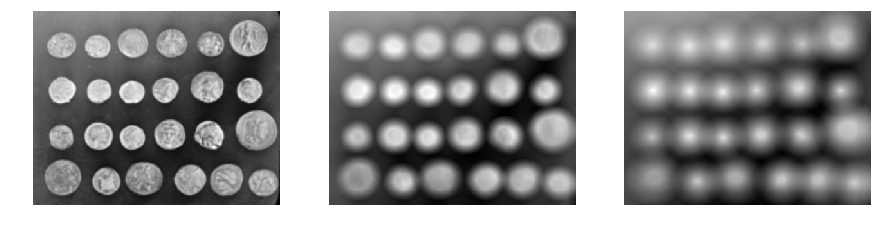

In [ ]:
from skimage.filters import rank
from skimage.morphology import disk

fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
filts = [2, 10, 20]

counter = 0
for ax, filt in zip(axes, filts):
    ax.imshow(rank.mean(coins, selem=disk(filt)), cmap='gray')
    ax.axis('off')
    counter += 1

Another little nuance is the shape of the structuring element, defined by the variable `selem`:

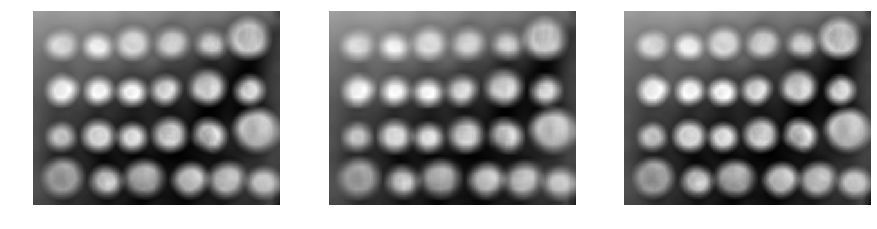

In [ ]:
from skimage.morphology import square, star

fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
filts = [disk(10), square(20), star(7)]

counter = 0
for ax, filt in zip(axes, filts):
    ax.imshow(rank.mean(coins, selem=filt), cmap='gray')
    ax.axis('off')
    counter += 1

A Gaussian filter is very similar, but the pixel values within the structuring element are no longer all one. They are weighted, such that they drop off following a Gaussian curve the farther you are away from the the center of the structuring element. Instead of adjusting the size of the structuring element, you adjust the standard deviation of the Gaussian curve.

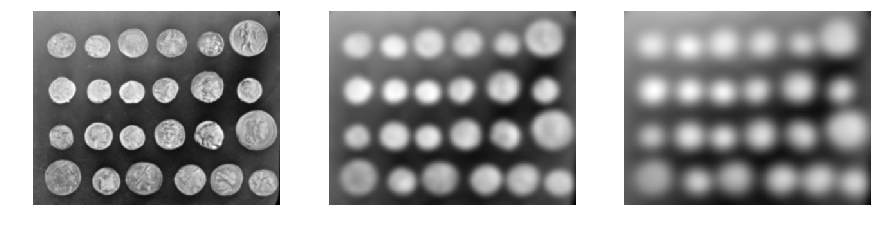

In [ ]:
from skimage.filters import gaussian

fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
filts = [1, 5, 10]

counter = 0
for ax, filt in zip(axes, filts):
    ax.imshow(gaussian(coins, sigma=filt), cmap='gray')
    ax.axis('off')
    counter += 1

Even just using a Gaussian filter can improve our segmentation problem. Let's try applying a threshold to the above images:

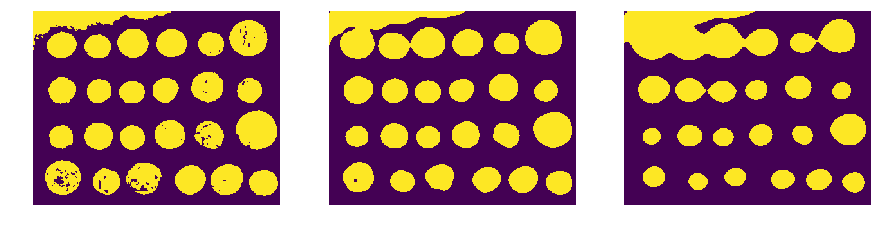

In [ ]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
filts = [1, 5, 10]

counter = 0
for ax, filt in zip(axes, filts):
    ax.imshow(gaussian(coins, sigma=filt) > 1.2*np.mean(gaussian(coins, sigma=filt)))
    ax.axis('off')
    counter += 1

The next step in the Canny edge detector is an intensity gradient of the input image. There are several different gradient functions available, all using different approximations of the actual gradient, which is computationally expensive. Let's try out a few:

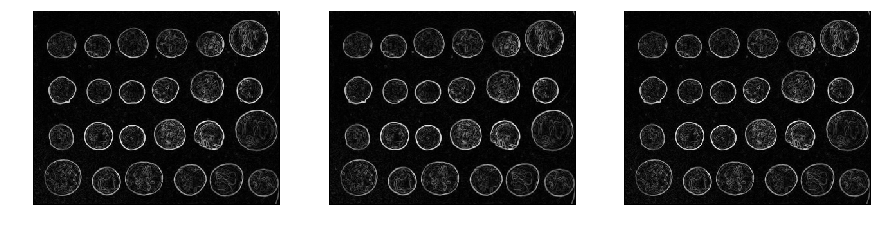

In [ ]:
from skimage.filters import sobel, prewitt, scharr

fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
filts = [sobel(coins), prewitt(coins), scharr(coins)]

counter = 0
for ax, filt in zip(axes, filts):
    ax.imshow(filt, cmap='gray')
    ax.axis('off')
    counter += 1

Let's try adding a Gaussian filter, an edge detector, and a threshold all together to make our own mini Canny edge detector:

In [1]:
fig, axes = plt.subplots(figsize=(19, 6), ncols=4)

axes[0].imshow(coins, cmap='gray')
axes[1].imshow(gaussian(coins, sigma=2), cmap='gray')
axes[2].imshow(sobel(gaussian(coins, sigma=2)), cmap='gray')
axes[3].imshow(sobel(gaussian(coins, sigma=2)) > 0.03, cmap='gray')

for ax in axes:
    ax.axis('off')

NameError: ignored

Let's jump back to our image registration problem. So far, we have been able to detect the edges of the coins using the Canny edge detector. But this isn't actually what we wanted: we wanted to be able to separate the coins out, not their edges. We can solve this problem with a handy hole filler tool called `binary_fill_holes` that's in a separate package, `scipy`.

`binary_fill_holes` works by a clever trick. Think of each white pixel, shape, line, as a wall. In this analogy, `binary_fill_holes` floods the image with water. Anything that doesn't get filled with water is set to `True`. 

(-0.5, 383.5, 302.5, -0.5)

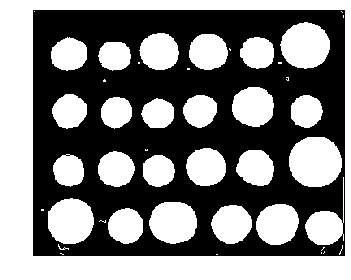

In [ ]:
from scipy.ndimage.morphology import binary_fill_holes

bi_coins = binary_fill_holes(edges > 0.001)

sio.imshow(bi_coins)
plt.axis('off')

Finally, we can use a useful command to clear up any small objects that likely are false positives and not actually coins:

(-0.5, 383.5, 302.5, -0.5)

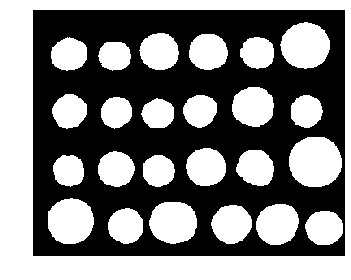

In [ ]:
from skimage.morphology import remove_small_objects

cl_coins = remove_small_objects(bi_coins)

sio.imshow(cl_coins)
plt.axis('off')

Sweet, right?! We were successfully able to separate the coins from the background. This in itself is a pretty big step, but we still don't have access to the properties of the shapes of the coins themselves. How do we do that? `skimage` has a set of functions in the `measure` module that help us get there.

The first is `label`. `label` does exactly what it says: it labels each unique object in the binary image with a number. It records the label number as a pixel value. 

(-0.5, 383.5, 302.5, -0.5)

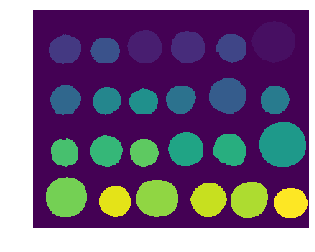

In [ ]:
from skimage.measure import label

lab_coins = label(cl_coins)

fig, ax = plt.subplots()
ax.imshow(lab_coins*10, vmin=0)
ax.axis('off')

In [ ]:
lab_coins[100:120, 100:110]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 11, 11, 11, 11, 11, 11,  0,  0,  0],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11]], dtype=int64)

In [ ]:
label?

We can use our labelled image as the input to the function `

In [ ]:
from skimage.measure import regionprops
import pandas as pd

props = regionprops(lab_coins, intensity_image=coins)
x = np.zeros(len(props))
y = np.zeros(len(props))
area = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props))

counter = 0
for prop in props:
    x[counter] = prop.centroid[0]
    y[counter] = prop.centroid[1]
    area[counter] = prop.area
    perim[counter] = prop.perimeter
    intensity[counter] = prop.mean_intensity
    
    counter += 1

regionprops = pd.DataFrame({'X': x, 'Y': y, 'Area': area,
                            'Perim': perim, 'Mean Intensity': intensity})

In [ ]:
regionprops

,X,Y,Area,Perim,Mean Intensity
0,43.570795,334.727542,2705.0,194.166522,153.787061
1,50.782808,155.257307,1745.0,154.367532,165.698567
2,51.179577,215.306338,1704.0,152.710678,154.301056
3,54.345188,44.104603,1434.0,142.089358,164.997211
4,52.371736,276.124424,1302.0,134.811183,150.298003
5,56.095116,100.258783,1167.0,128.568542,180.245930
6,118.759030,270.640277,2021.0,167.539105,154.134587
7,124.338182,44.655273,1375.0,137.882251,185.500364
8,123.802479,205.229280,1291.0,132.468037,165.948102
9,124.458833,336.145484,1251.0,131.639610,164.188649
